In [1]:
import numpy as np
import pandas as pd
import os
import yellowbrick as yb

for m in yb, np, pd:
    print(m.__name__, '===.', m.__version__)

yellowbrick ===. 0.9.1
numpy ===. 1.16.4
pandas ===. 0.25.0


In [2]:
data = pd.read_csv('./data/bikeshare/bikeshare.csv')
X = data[[
    "season", "month", "hour", "holiday", "weekday", "workingday",
    "weather", "temp", "feelslike", "humidity", "windspeed"
]]
y = data["riders"]

In [3]:
data.head()

,rowid,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,feelslike,humidity,windspeed,casual,registered,riders
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
data.describe()

,rowid,season,year,month,hour,holiday,weekday,workingday,weather,temp,feelslike,humidity,windspeed,casual,registered,riders
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


/home/jiaobendaye/anaconda3/envs/tf1x/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


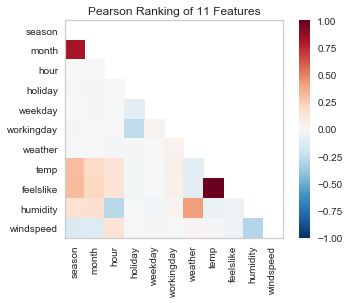

In [6]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(X)
visualizer.poof()

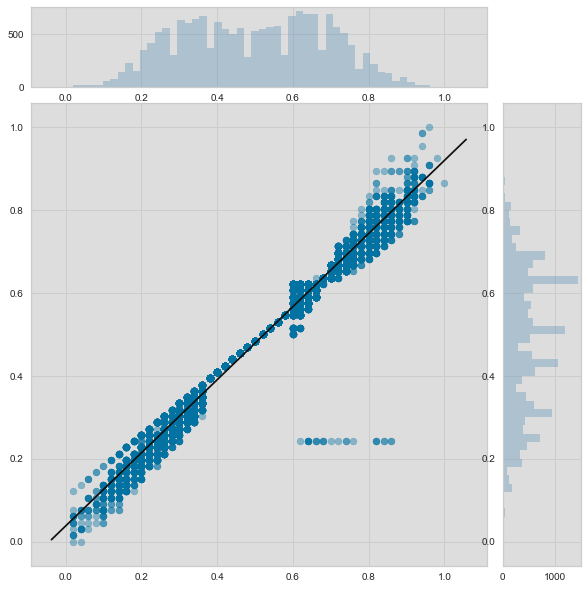

In [7]:
from yellowbrick.features import JointPlotVisualizer

visualizer = JointPlotVisualizer(feature='temp', target='feelslike')
visualizer.fit(X['temp'], X['feelslike'])
visualizer.poof()